In [49]:
import numpy as np
import pandas as pd
import os

This is a regression model to figure out how FPAR and CO2 relate and visualized on the graph. For this model, we took other quantities such as NDVI and GPP along with FPAR.

The dataset of FPAR, NDVI and GPP is taken from the Google Earth Engine and used the data from the tif image generated for 
01-01-2010 and its dimensions are mapped to the CO2 values which are taken from NASA GES DISC dataset. The CO2 values are kriged to the dimensions of the above quantites to map it to a particular pixel or point.

In [50]:
df = pd.read_csv(r'final_values_ndvi_gpp_linear.csv')
df.head()

,Unnamed: 0,longitude,latitude,co2,fpar,ndvi,gpp
0,0,70.000000,22.0,387.998269,15.0,0.129136,39.0
1,1,70.006793,22.0,388.000619,16.0,0.140011,39.0
2,2,70.013587,22.0,388.002968,12.0,0.136313,33.0
3,3,70.020380,22.0,388.005315,15.0,0.131753,31.0
4,4,70.027174,22.0,388.007660,10.0,0.116916,31.0


In [51]:
df

,Unnamed: 0,longitude,latitude,co2,fpar,ndvi,gpp
0,0,70.000000,22.0,387.998269,15.0,0.129136,39.0
1,1,70.006793,22.0,388.000619,16.0,0.140011,39.0
2,2,70.013587,22.0,388.002968,12.0,0.136313,33.0
3,3,70.020380,22.0,388.005315,15.0,0.131753,31.0
4,4,70.027174,22.0,388.007660,10.0,0.116916,31.0
...,...,...,...,...,...,...,...
289938,289938,74.972826,26.0,386.624549,56.0,0.621101,255.0
289939,289939,74.979620,26.0,386.623147,57.0,0.613845,265.0
289940,289940,74.986413,26.0,386.621757,57.0,0.585597,248.0
289941,289941,74.993207,26.0,386.620377,54.0,0.434974,192.0


In [52]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Diving the data into a smaller subset

In [53]:
frac_data = df.sample(frac=0.003)

Finding the relation with the FPAR with NDVI from the fraction of the large dataset by linear regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
y1 = frac_data['ndvi'].values.reshape(-1,1)
x1 = frac_data['fpar'].values.reshape(-1,1)
reg1 = LinearRegression()
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
reg1.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

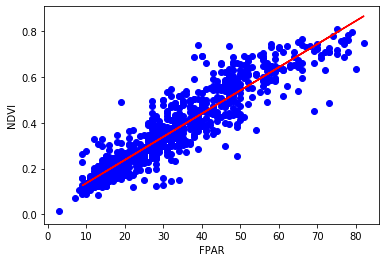

In [57]:
plt.scatter(x1, y1, color='blue')
plt.plot(x1_test, y1_pred, color='red')
plt.xlabel('FPAR')
plt.ylabel('NDVI')
plt.show()

In [58]:
r2_score(y1_test, y1_pred)

0.8525314830038925

The R2 score for the relation between FPAR and NDVI is around 0.85. So there is a linear relationship between both of them.

Similarly we get the results for FPAR and GPP

In [59]:
y2 = frac_data['gpp'].values.reshape(-1,1)
x2 = frac_data['fpar'].values.reshape(-1,1)
reg2 = LinearRegression()
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)
reg2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y2_pred = reg2.predict(x2_test)

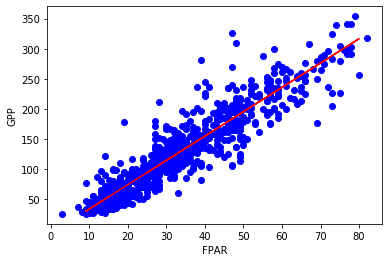

In [61]:
plt.scatter(x2, y2, color='blue')
plt.plot(x2_test, y2_pred, color='red')
plt.xlabel('FPAR')
plt.ylabel('GPP')
plt.show()

In [62]:
r2_score(y2_test, y2_pred)

0.8490399646212038

The R2 score is around 0.84 between FPAR and GPP.

For relation between NDVI and GPP similarly we will get the linear relationship

In [63]:
y3 = frac_data['gpp'].values.reshape(-1,1)
x3 = frac_data['ndvi'].values.reshape(-1,1)
reg3 = LinearRegression()
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)
reg3.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y3_pred = reg3.predict(x3_test)

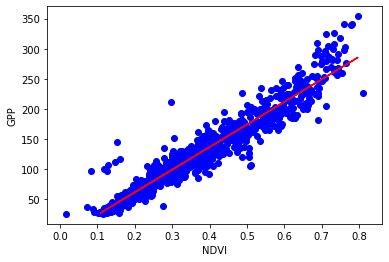

In [65]:
plt.scatter(x3, y3, color='blue')
plt.plot(x3_test, y3_pred, color='red')
plt.xlabel('NDVI')
plt.ylabel('GPP')
plt.show()

In [66]:
r2_score(y3_test, y3_pred)

0.9505401169537091

The R2 score between NDVI and GPP is around 0.95. So we can say all three quantities are linearly proportional to one another.

So we can make use of these three quantites together to find the relation with CO2 in the atmosphere to get better results.

Using these three quantites to find the CO2 relation

In [70]:
y = frac_data['co2']
x = frac_data[['fpar', 'ndvi', 'gpp']]

In [71]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [4]:
reg.score(y_test,y_pred)

NameError: name 'reg' is not defined

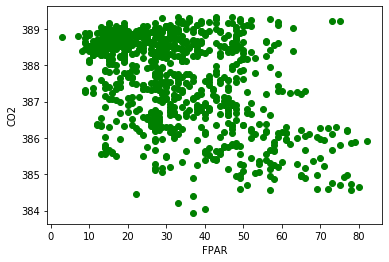

In [76]:
plt.scatter(x['fpar'], y, color='green')
#plt.plot(x_test['fpar'], y_pred, color='red')
plt.xlabel('FPAR')
plt.ylabel('CO2')
plt.show()

We can see that there are more points on the upper left corner of the graph where the value of FPAR is small and for CO2 in ppm is more. So the general trend observed is that as the value of FPAR increase, there is decrease in the value if CO2.

The R2 for the multivariate regression model is 0.32 approx.

So the relationship doesn't seem to be linear as there are many exceptions to these general trend which is observed in the graph. One of the main factors contributing to this is that the model does not take the factors such as industrial output, livestock related and other human influences which contribute to the amount of CO2 in the atmosphere as the model uses FPAR, GPP and NDVI only.

These should be one of the reasons for the anomalies that can be seen in the above graph.